# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent. 
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

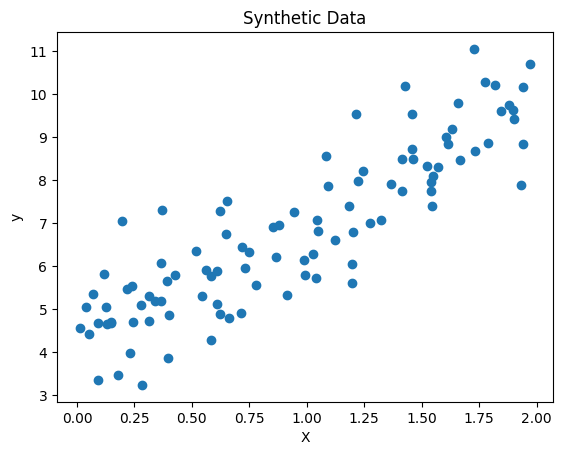

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [16]:


# Write your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train= ", X_train.shape)
print("X_test =", X_test.shape)
print("y_train=", y_train.shape)
print("y_test=", y_test.shape)

X_train=  (75, 1)
X_test = (25, 1)
y_train= (75, 1)
y_test= (25, 1)


## Do the Linear Regression with Scikit-Learn Library

In [17]:
# Write your code here

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept", model.intercept_)
print("slope", model.coef_)

Intercept [4.16878815]
slope [[2.72587297]]


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [22]:
# Write your code here
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "model": name,
        "mae":mean_absolute_error(y_test, y_pred), 
        "r2 score": r2_score(y_test, y_pred)
    })
pd.DataFrame(results)

,model,mae,r2 score
0,Linear Regression,0.638010,0.831099
1,Ridge Regression,0.632322,0.825999
2,Lasso Regression,1.797561,-0.085291


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

## 🧠 Custom Linear Regression Class

In [23]:
class MyLinearRegression:
    def __init__(self):
        self.m = 0
        self.c = 0
        self.loss_history = []  
    def fit(self, X, y, lr=0.01, n_iters=1000):
        n = len(X)
        for _ in range(n_iters):
            y_pred = self.m * X + self.c
            error = y_pred - y

            loss = np.mean(error ** 2)  
            self.loss_history.append(loss)  
            dm = (2/n) * np.sum(X * error)
            dc = (2/n) * np.sum(error)
            self.m -= lr * dm
            self.c -= lr * dc

    def predict(self, X):
        return self.m * X + self.c

## 🔁 Train the Model and Visualize the Fit

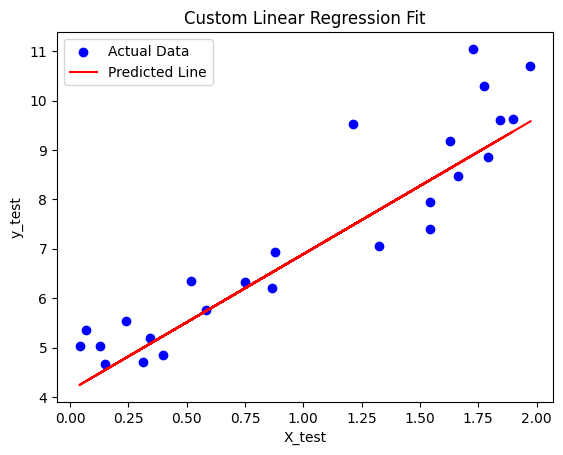

In [26]:
import matplotlib.pyplot as plt

# Train the model
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Visualization
plt.scatter(X_test, y_test, label="Actual Data", color='blue')
plt.plot(X_test, y_pred, color="red", label="Predicted Line")
plt.legend()
plt.title("Custom Linear Regression Fit")
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()


## 📉 Plot the Loss Curve

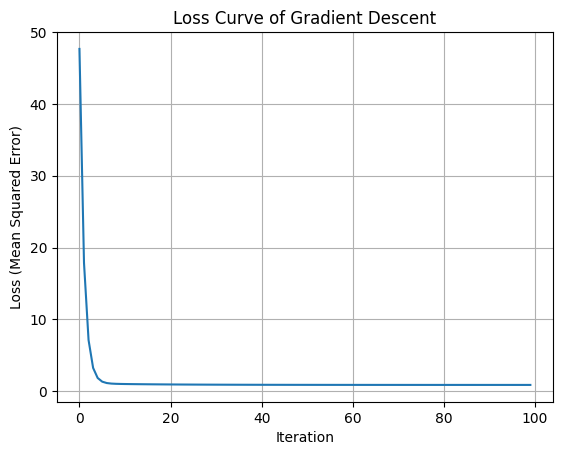

In [27]:
# Write your code here
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Loss Curve of Gradient Descent")
plt.grid(True)
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [32]:


# Write your code here
class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0  
        self.c = 0  
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=100):
        n = len(X)

        for _ in range(n_iters):            
            idx = np.random.randint(n)
            xi = X[idx]
            yi = y[idx]
            y_pred = self.m * xi + self.c
            error = y_pred - yi
            dm = 2 * xi * error
            dc = 2 * error
            self.m -= lr * dm
            self.c -= lr * dc
            total_pred = self.m * X + self.c
            loss = np.mean((total_pred - y) ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        return self.m * X + self.c

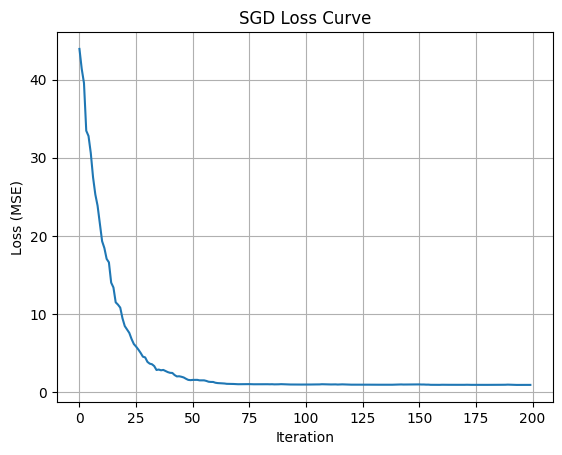

In [ ]:

# Plot loss curve while using Stochastic Gradient Descent
model_sgd = MyLinearRegressionSGD()
model_sgd.fit(X_train, y_train, lr=0.01, n_iters=200)
plt.plot(model_sgd.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("SGD Loss Curve")
plt.grid(True)
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

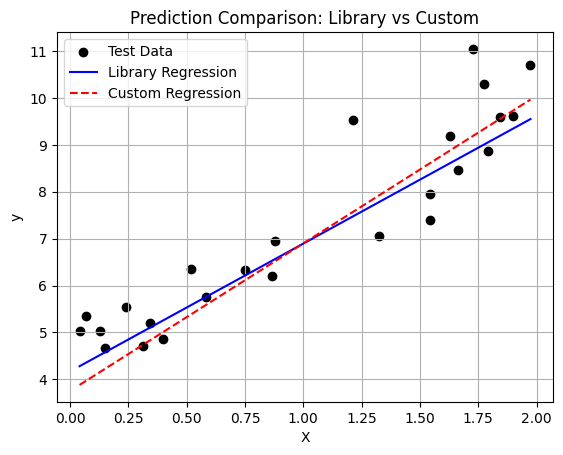

In [37]:

# Write your code here
lib_model = LinearRegression()
lib_model.fit(X_train, y_train)
lib_pred = lib_model.predict(X_test)

custom_pred = model_sgd.predict(X_test)

X_test_flat = X_test.flatten()
lib_pred_flat = lib_pred.flatten()
custom_pred_flat = custom_pred.flatten()

sorted_idx = X_test_flat.argsort()
X_sorted = X_test_flat[sorted_idx]
lib_sorted = lib_pred_flat[sorted_idx]
custom_sorted = custom_pred_flat[sorted_idx]

plt.scatter(X_test, y_test, color='black', label="Test Data")
plt.plot(X_sorted, lib_sorted, color='blue', label="Library Regression")
plt.plot(X_sorted, custom_sorted, color='red', linestyle='--', label="Custom Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Prediction Comparison: Library vs Custom")
plt.legend()
plt.grid(True)
plt.show()



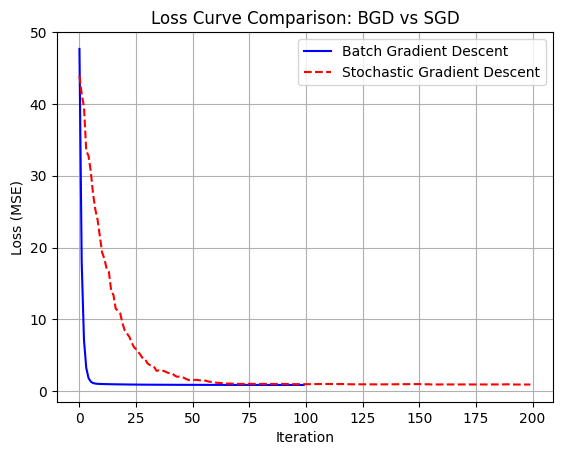

In [38]:
plt.plot(model.loss_history, label="Batch Gradient Descent", color="blue")
plt.plot(model_sgd.loss_history, label="Stochastic Gradient Descent", color="red", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve Comparison: BGD vs SGD")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version